# Vaje 4: Posebnosti binarne klasifikacije in odločitvena drevesa

## Naloga 1: Mere kakovosti

In [3]:
import numpy as np

data = np.load("vaje4_1.npy")
X = data[:, :-1]
y =data[:, -1].astype(bool)
X

array([[  1. ,   0. ,  22. , ...,   0. ,   0. ,   1. ],
       [  2. ,   1. ,  38. , ...,   1. ,   0. ,   0. ],
       [  3. ,   1. ,  26. , ...,   0. ,   0. ,   1. ],
       ...,
       [889. ,   0. ,  22.5, ...,   0. ,   0. ,   1. ],
       [890. ,   1. ,  26. , ...,   1. ,   0. ,   0. ],
       [891. ,   0. ,  32. , ...,   0. ,   1. ,   0. ]])

1.a: Najdi najboljšo vrednost parametra k za napovedni model k najbližjih sosedov v primeru, ko za mero kakovosti izberemo natančnost (precision), priklic, ali ploščino pod ROC krivuljo (AUC ROC). Za oceno napake uporabi 5 kratno prečno preverjanje.

<details>
  <summary>Namig:</summary>

  *Pomagaj si s [funkcijami sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).
   
</details>

In [18]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Minimums
min_prec = {}
min_recall = {}
min_roc = {}


for k in range(1, 18):
    model = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print('k:',k, 'precision:', round(precision_score(y_test, y_pred), 4),'priklic:',  round(recall_score(y_test, y_pred), 4),'ROC:', round(roc_auc_score(y_test, y_pred), 4))
        min_prec[(k, 'precision')] = min(precision_score(y_test, y_pred), min_prec.get((k, 'precision'), 1))
        min_recall[(k, 'recall')] = min(recall_score(y_test, y_pred), min_recall.get((k, 'recall'), 1))
        min_roc[(k, 'ROC')] = min(roc_auc_score(y_test, y_pred), min_roc.get((k, 'ROC'), 1))
print('Choice of k: precision:', min_prec, 'priklic:', min_recall, 'ROC:', min_roc)

k: 1 precision: 0.5167 priklic: 0.4189 ROC: 0.5714
k: 1 precision: 0.5538 priklic: 0.5373 ROC: 0.638
k: 1 precision: 0.5152 priklic: 0.4857 ROC: 0.5947
k: 1 precision: 0.3974 priklic: 0.4697 ROC: 0.525
k: 1 precision: 0.4265 priklic: 0.4462 ROC: 0.5505
k: 2 precision: 0.6667 priklic: 0.2162 ROC: 0.57
k: 2 precision: 0.6667 priklic: 0.2985 ROC: 0.6042
k: 2 precision: 0.7143 priklic: 0.2143 ROC: 0.5794
k: 2 precision: 0.4848 priklic: 0.2424 ROC: 0.5453
k: 2 precision: 0.4615 priklic: 0.1846 ROC: 0.5304
k: 3 precision: 0.551 priklic: 0.3649 ROC: 0.5777
k: 3 precision: 0.4627 priklic: 0.4627 ROC: 0.5692
k: 3 precision: 0.5532 priklic: 0.3714 ROC: 0.5885
k: 3 precision: 0.4561 priklic: 0.3939 ROC: 0.5586
k: 3 precision: 0.4364 priklic: 0.3692 ROC: 0.5474
k: 4 precision: 0.5926 priklic: 0.2162 ROC: 0.5557
k: 4 precision: 0.6 priklic: 0.3134 ROC: 0.5937
k: 4 precision: 0.75 priklic: 0.3 ROC: 0.6176
k: 4 precision: 0.4595 priklic: 0.2576 ROC: 0.5395
k: 4 precision: 0.5556 priklic: 0.2308 ROC: 

1.b: Najdi najboljšo vrednost parametra k v primeru, ko za mero kakovosti izberemo najmanjšo ceno modela, kjer predpostavljamo, da je napaka tipa 1 dvakrat dražja od napake tipa 2. Napako tipa 1 (zmotno pozitivni)  merite kot delež tistih negativnih primerov, ki so bili zmotno razglašeni za pozitivne. Analogno definirajte napako tipa 2 (zmotno negativni). Končna napaka naj bo torej vsota 2 N1 + N2. Postopate lahko podobno kot zgoraj pri natančnosti. Pomagaš si lahko s funkcijama `numpy.logical_not` in `numpy.logical_and`.

In [23]:
def custom_score(y_test, y_pred):
    return 2 * np.logical_and(np.logical_not(y_test), y_pred).sum() + np.logical_and(np.logical_not(y_pred), y_test).sum()

metrics = {k:[] for k in range(1, 42)}

for k in range(1, 42):
    model = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics[k].append(custom_score(y_test, y_pred))
print('Choice of k:', {k: np.mean(v) for k, v in metrics.items()})
print('Opitmal k:' , min(metrics, key=metrics.get))

Choice of k: {1: 106.6, 2: 74.6, 3: 98.0, 4: 76.0, 5: 86.4, 6: 75.6, 7: 85.8, 8: 76.8, 9: 80.8, 10: 72.8, 11: 81.2, 12: 75.2, 13: 81.4, 14: 77.2, 15: 78.4, 16: 70.8, 17: 76.2, 18: 67.8, 19: 70.2, 20: 68.4, 21: 71.4, 22: 65.8, 23: 67.6, 24: 65.2, 25: 66.6, 26: 63.4, 27: 66.2, 28: 63.2, 29: 63.8, 30: 63.0, 31: 63.8, 32: 62.8, 33: 61.6, 34: 62.0, 35: 63.0, 36: 62.0, 37: 63.0, 38: 61.2, 39: 61.8, 40: 62.2, 41: 62.2}
Opitmal k: 27


1.c: Pri katerih nalogah v resničnem življenju se splača bolj utežiti N1 in pri katerih N2? Kaj je bolj važno za npr. teste, ki zaznavajo okužbe?

Verjetno je bolje da se izognemo false negativom, torej bolj obtezimo N2.

## Naloga 2: ROC

2.a: Nariši ROC krivuljo za naslednje podatke

| Napoved  | Ciljna spremenljivka | TPR | FPR |
| -------- | ----------- | ------ | ------|
| 0.9      | T       | 1/4      | 0     |
| 0.7      | F       | 1/2      | 1/4   |
| 0.7      | T       | 1/2      | 1/4   |
| 0.5      | F       | 1/2      | 1/2   |
| 0.3      | T       | 3/4      | 1/2   |
| 0.2      | T       | 1        | 3/4   |
| 0.2      | F       | 1        | 3/4   |
| 0.1      | F       | 1        | 1     |


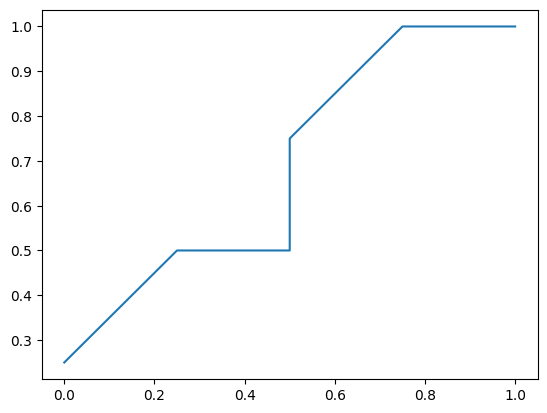

In [31]:
import matplotlib.pyplot as plt
TPR = [0.25, 0.5, 0.5, 0.75, 1, 1]
FPR = [0, 0.25, 0.5, 0.5, 0.75, 1]
plt.plot(FPR, TPR, label='ROC')

2.b: Koliko je točnost modela iz 2.a glede na metriko ROC-AUC.

izracunamo ploscino pod krivuljo inn dobimo, da je tocnost 11/16.

## Naloga 3: Odločitvena drevesa

3.a: Sestavi podatkovno množico, ki bo "šla na roko" odločitvenim drevesom. Pomagaj si s funkcijami `numpy.random.randint` in logičnimi operatorji `numpy.logical_not`, ...

In [41]:
# Dataset that suits the decision tree model with numpy.random.randint and numpy.logical_not
np.random.seed(42)
X = np.zeros((1000, 5), dtype = int)
X[:, 0] = np.random.randint(2, size=(1000, ))
X[:, 1] = np.random.randint(3, size=(1000, ))
X[:, 2] = np.random.randint(5, size=(1000, ))
X[:, 3] = np.random.randint(3, size=(1000, ))
X[:, 4] = np.random.randint(2, size=(1000, ))
y = np.logical_not(np.logical_xor(X[:, 0], X[:, 1])) | np.logical_not(np.logical_xor(X[:, 2], X[:, 3])) | np.logical_not(X[:, 4]) == False


3.b: Preveri točnost odločitvenih dreves na podatkovni množici iz naloge 3.a. Za vsak vzorec prečnega preverjanja izriši tabelo napačnih klasifikacij (confusion matrix).

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [objektom sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) in [objektom sklearn.tree.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)*.
   
</details>

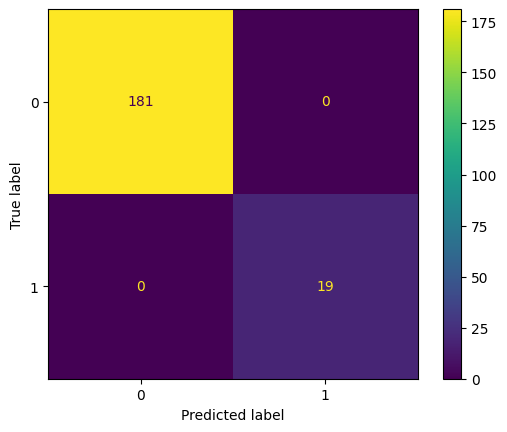

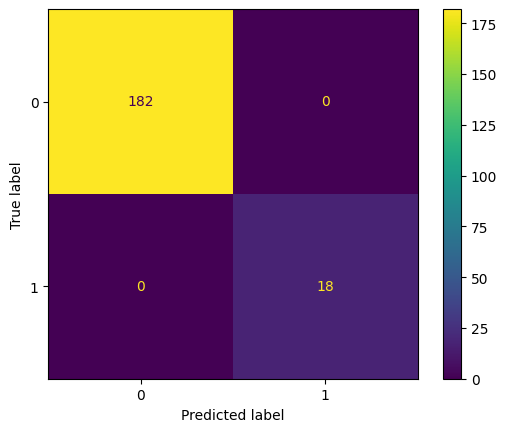

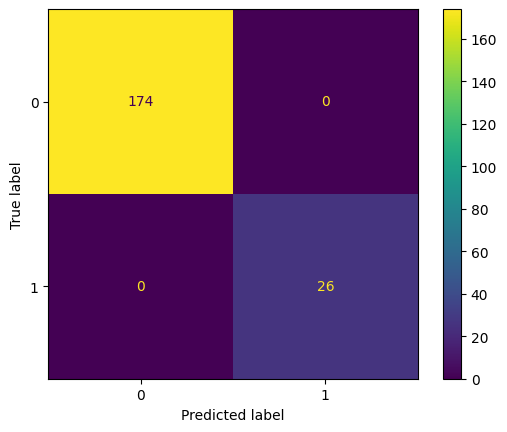

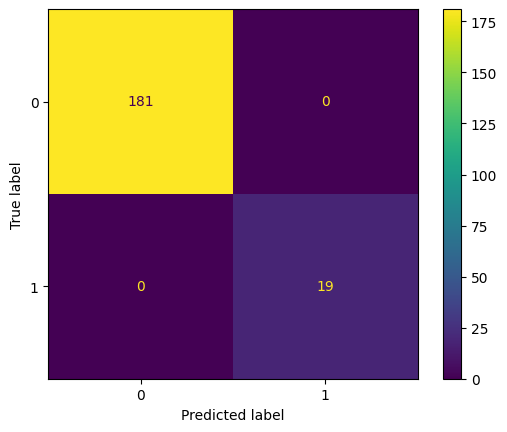

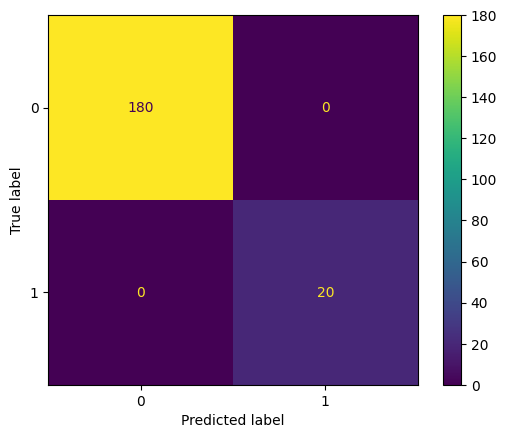

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot()

3.c: Natreniraj model odločitvenih dreves na vseh podatkih in drevo vizualiziraj. Lahko v nastalem drevesu najdete vsa pravila iz naloge 3.a?

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [objektom sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)*.
   
</details>

[Text(0.4128787878787879, 0.9375, 'x[4] <= 0.5\ngini = 0.191\nsamples = 1000\nvalue = [893, 107]'),
 Text(0.18181818181818182, 0.8125, 'x[1] <= 1.5\ngini = 0.012\nsamples = 511\nvalue = [508, 3]'),
 Text(0.12121212121212122, 0.6875, 'x[2] <= 0.5\ngini = 0.006\nsamples = 355\nvalue = [354, 1]'),
 Text(0.09090909090909091, 0.5625, 'x[0] <= 0.5\ngini = 0.028\nsamples = 71\nvalue = [70, 1]'),
 Text(0.06060606060606061, 0.4375, 'x[1] <= 0.5\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(0.030303030303030304, 0.3125, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.09090909090909091, 0.3125, 'x[3] <= 1.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06060606060606061, 0.1875, 'x[3] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.030303030303030304, 0.0625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.09090909090909091, 0.0625, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.12121212121212122, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),


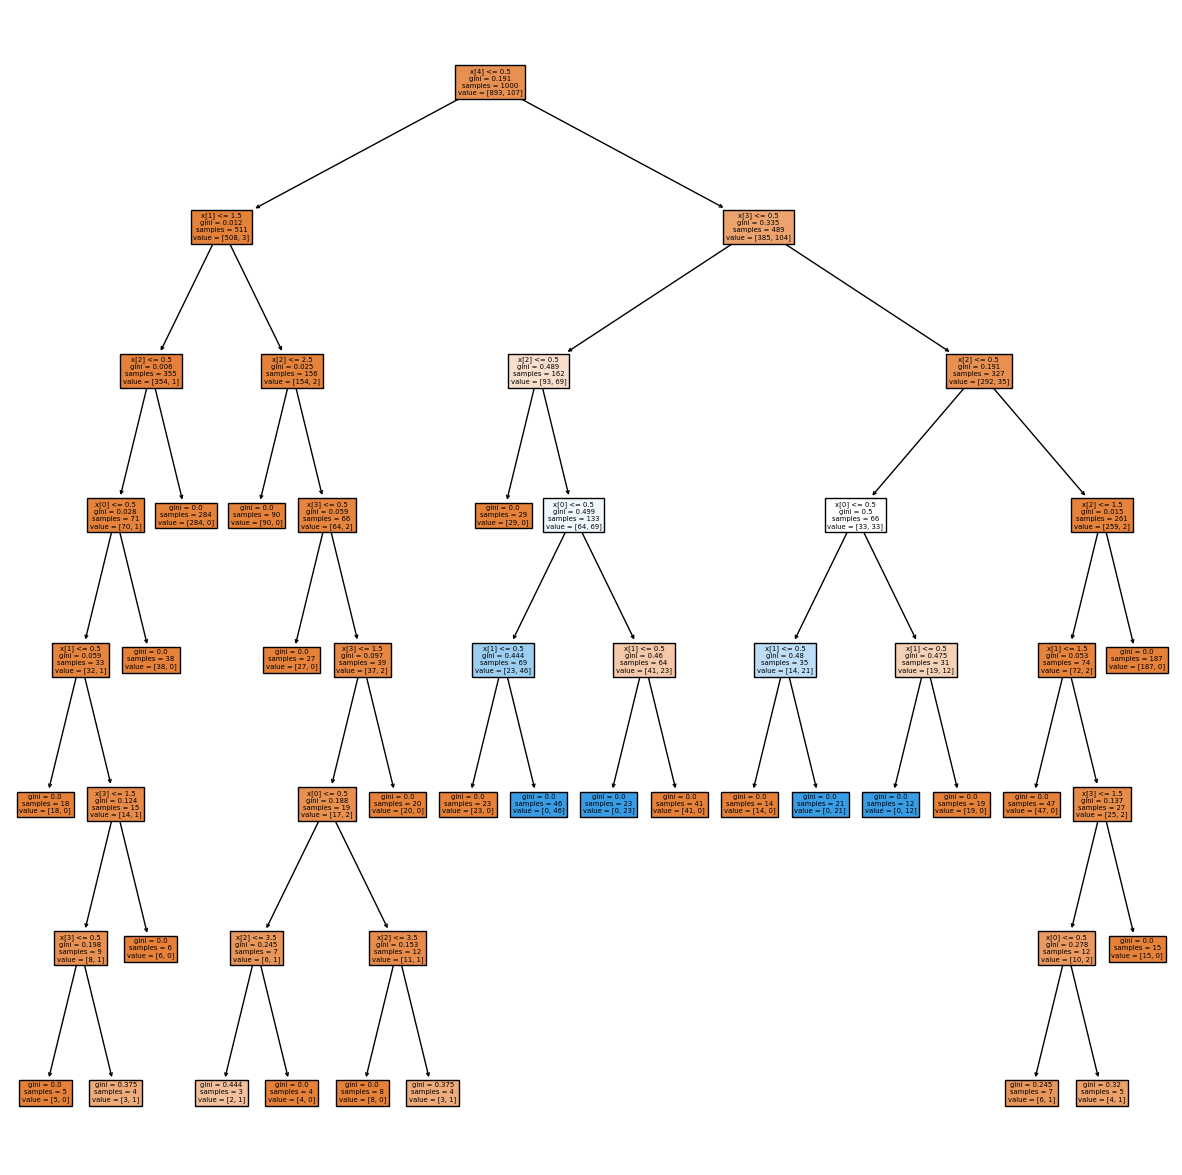

In [50]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier()
dt.fit(X, y)

plt.figure(figsize=(15, 15))
plot_tree(dt, filled=True)

3.d: Naključno izberi 5 vrstic iz podatkovne množice in jim spremeni ciljno vrednost. Natreniraj model odločitvenih dreves z višino največ 4 in ga ponovno vizualiziraj. Vidiš kakšno razliko v listih drevesa?

[Text(0.4, 0.9, 'x[4] <= 0.5\ngini = 0.183\nsamples = 1000\nvalue = [898, 102]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 511\nvalue = [511, 0]'),
 Text(0.5, 0.7, 'x[3] <= 0.5\ngini = 0.33\nsamples = 489\nvalue = [387, 102]'),
 Text(0.2, 0.5, 'x[2] <= 0.5\ngini = 0.489\nsamples = 162\nvalue = [93, 69]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.3, 0.3, 'x[0] <= 0.5\ngini = 0.499\nsamples = 133\nvalue = [64, 69]'),
 Text(0.2, 0.1, 'gini = 0.444\nsamples = 69\nvalue = [23, 46]'),
 Text(0.4, 0.1, 'gini = 0.46\nsamples = 64\nvalue = [41, 23]'),
 Text(0.8, 0.5, 'x[2] <= 0.5\ngini = 0.181\nsamples = 327\nvalue = [294, 33]'),
 Text(0.7, 0.3, 'x[0] <= 0.5\ngini = 0.5\nsamples = 66\nvalue = [33, 33]'),
 Text(0.6, 0.1, 'gini = 0.48\nsamples = 35\nvalue = [14, 21]'),
 Text(0.8, 0.1, 'gini = 0.475\nsamples = 31\nvalue = [19, 12]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 261\nvalue = [261, 0]')]

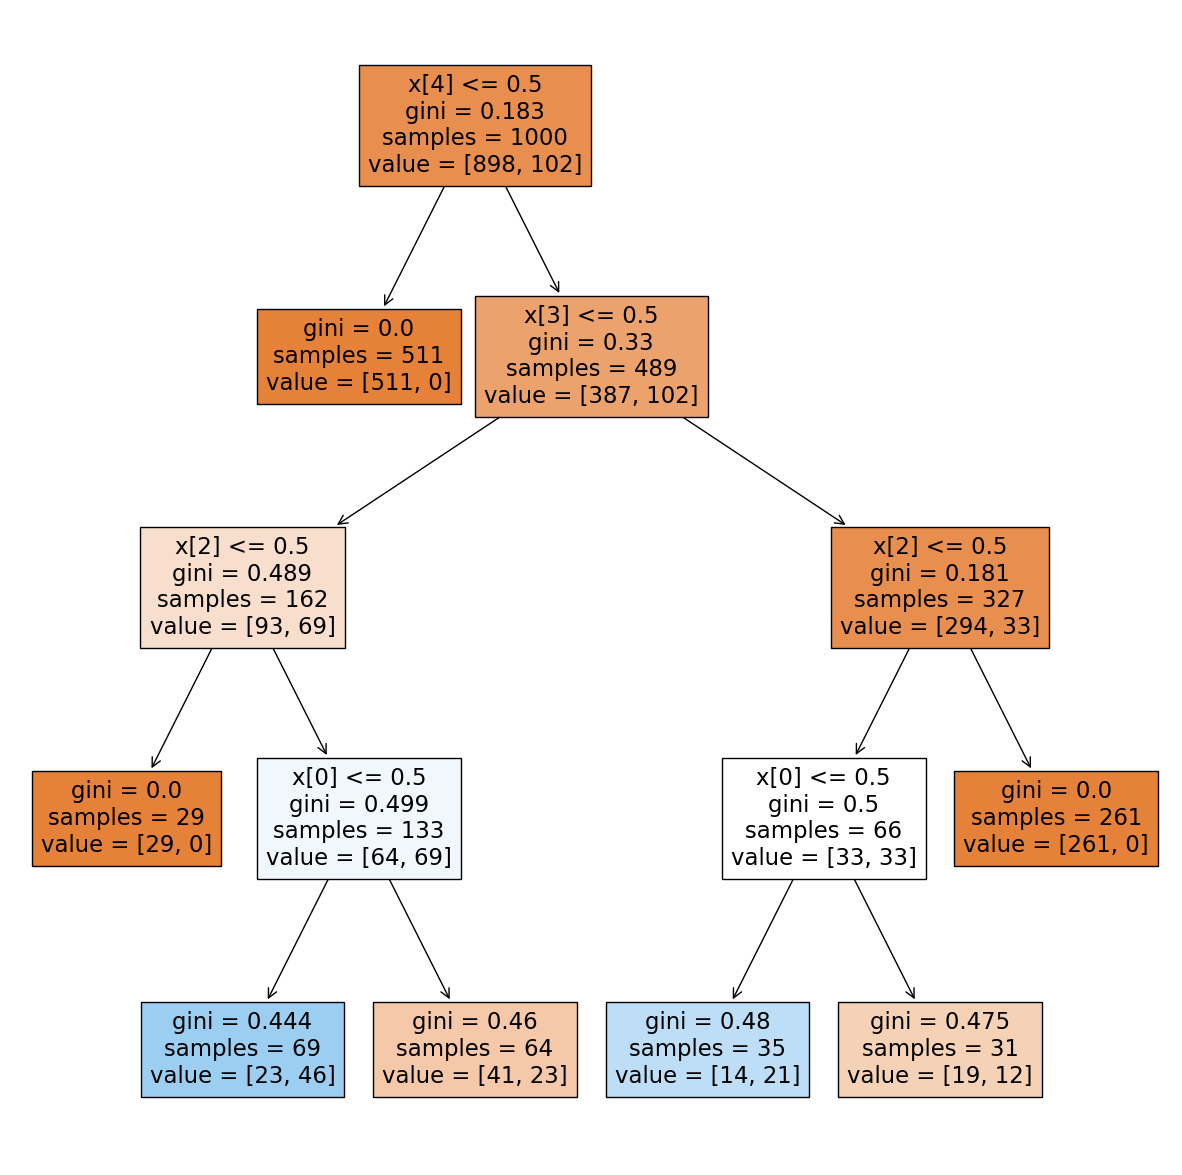

In [51]:
# Randomly select 5 lines from the dataset and change the target_variable
np.random.seed(42)
idx = np.random.choice(range(1000), 5, replace=False)
y[idx] = np.logical_not(y[idx])

dt2 = DecisionTreeClassifier(max_depth=4)
dt2.fit(X, y)

plt.figure(figsize=(15, 15))
plot_tree(dt2, filled=True)

Tokrat ne pridemo do entonih razredov, v listih se odlocimo za vecinski razred.